In [1]:
# Importing Dependencies

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load .csv File to DataFrame

print("Insurance DataFrame - ")

df = pd.read_csv("insurance.csv")
df.head()

Insurance DataFrame - 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(f"Number of Duplicates = {df.duplicated().sum()}")
print("\n")
print(f"Duplicate Row = \n{df[df.duplicated()]}")

Number of Duplicates = 1


Duplicate Row = 
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [6]:
# Dropping Duplicates

df.drop_duplicates(keep = "first", inplace = True)
print(f"After Dropping Duplicate Rows, Number of Duplicates = {df.duplicated().sum()}")

After Dropping Duplicate Rows, Number of Duplicates = 0


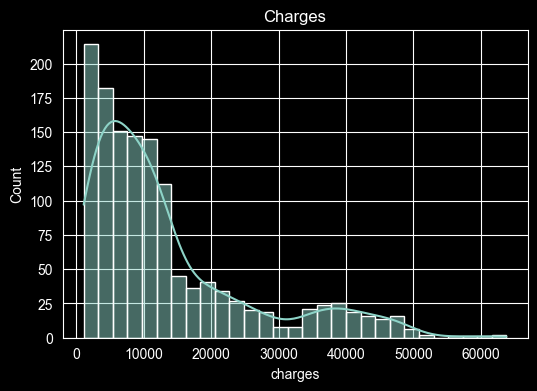

In [7]:
# Histogram

plt.figure(figsize = (6, 4))
sns.histplot(df["charges"], kde = True)
plt.title("Charges")
plt.show()

In [8]:
# One Hot Encoding

print("Transforming Categorical Data to Spare Matrix using OHE - ")
df = pd.get_dummies(df, drop_first = True).astype(int)
df.head()

Transforming Categorical Data to Spare Matrix using OHE - 


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [9]:
# Target Variable

y = df["charges"]
print(f"Target Variable Shape - {y.shape}")

Target Variable Shape - (1337,)


In [10]:
# Feature Variables

X = df.drop("charges", axis = 1)
print(f"Feature Variables Shape - {X.shape}")

Feature Variables Shape - (1337, 8)


In [11]:
# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"After Splitting Data -\nX_train shape = {X_train.shape}\nX_test shape = {X_test.shape}\ny_train shape = {y_train.shape}\ny_test shape = {y_test.shape}")

After Splitting Data -
X_train shape = (1069, 8)
X_test shape = (268, 8)
y_train shape = (1069,)
y_test shape = (268,)


In [12]:
# Standard Scaling -> to scale data with mean = 0 & sd = 1

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(f"After Scaling Feature Variables - \n{X_train.shape}\n{X_test.shape}")

After Scaling Feature Variables - 
(1069, 8)
(268, 8)


In [13]:
# Training Model

print("Model Training -")
model = LinearRegression()
model.fit(X_train, y_train)

Model Training -


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
y_predict = model.predict(X_test)

In [15]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, y_predict)
print(f"MAE = {mae}")

MAE = 4171.800293113269


In [16]:
# Mean Squared Error

mse = mean_squared_error(y_test, y_predict)
print(f"MSE = {mse}")

MSE = 35475294.142911255


In [17]:
# Root Mean Squared Error

r_mse = root_mean_squared_error(y_test, y_predict)
print(f"R-MSE = {r_mse}")

R-MSE = 5956.114013592357


In [18]:
# R2 Score

r2 = r2_score(y_test, y_predict)
print(f"R2 SCORE = {r2}")

R2 SCORE = 0.8069435680345955


In [19]:
print(f"Intercept = {model.intercept_}")
print(f"Coefficient = {model.coef_}")

Intercept = 13029.711880261924
Coefficient = [3475.74375944 1927.92627387  638.19112593  -50.51119582 9238.08793876
 -166.96239084 -377.29670179 -292.25535576]
